In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/data01/Tomo2Mesh/scratchpad/polymer_am_eaton/code/')
from tomo2mesh.projects.eaton.rw_utils import read_raw_data_1X, save_path
from tomo2mesh.projects.eaton.recon import recon_slice
from tomo2mesh.misc import viewer
from tomo2mesh.misc.voxel_processing import cylindrical_mask_slice, modified_autocontrast

In [5]:
projs1, theta1, center1, dark1, flat1 = read_raw_data_1X("1", "1")
img_l1 = recon_slice(projs1, theta1, center1, dark1, flat1, 1151, 3.13, pg_pad = 0)

1151
data shape: (ntheta, nz, n) (1500, 1, 2448)


In [6]:
projs, theta, center, dark, flat = read_raw_data_1X("1", "2")
img_l2 = recon_slice(projs, theta, center, dark, flat, 0, 3.13, pg_pad = 0)

0
data shape: (ntheta, nz, n) (1500, 1, 2448)


In [7]:
cylindrical_mask_slice(img_l1, 1.0, mask_val = img_l1.min())
cylindrical_mask_slice(img_l2, 1.0, mask_val = img_l2.min())

In [8]:
img_l1 = np.clip(img_l1, *modified_autocontrast(img_l1.reshape(-1), s = 0.05))
img_l2 = np.clip(img_l2, *modified_autocontrast(img_l2.reshape(-1), s = 0.05))

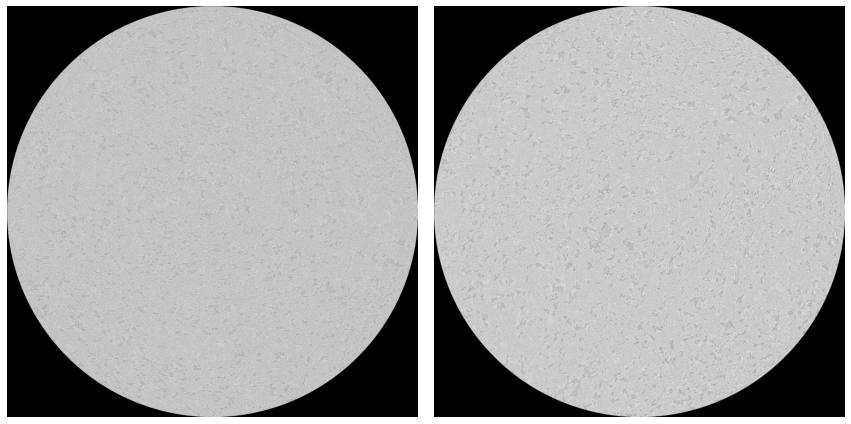

In [9]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
ax[0].imshow(img_l1, cmap = 'gray')
ax[0].axis('off')
ax[1].imshow(img_l2, cmap = 'gray')
ax[1].axis('off')
fig.tight_layout()

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(save_path)

In [4]:
df

,sample_num,layer,scan_num,rot_cen,flag,Y_motor,tomo0,tomo90,sample_pitch,sample_roll,sample_rotary,sample_x,sample_x_cent,sample_y,sample_z_cent
0,1,1,91,1228.25,0,NaN,NaN,NaN,0.003,0.280062,562.63,1.456613e-13,0.00,1.800009,0.00
1,1,2,94,1228.00,0,NaN,NaN,NaN,0.003,0.280062,8518.08,1.456613e-13,0.00,5.400009,0.00
2,1,3,95,1227.50,0,NaN,NaN,NaN,0.003,0.280062,9618.38,1.456613e-13,0.00,9.000009,0.00
3,1,4,96,1230.00,0,NaN,NaN,NaN,0.003,0.280062,14579.96,1.456613e-13,0.00,12.600009,0.00
4,2,1,105,1247.00,0,NaN,NaN,NaN,0.003,0.280062,34040.64,1.474376e-13,0.00,1.800009,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1011,11,179,1226.00,1,NaN,NaN,NaN,0.003,0.280062,178.51,1.474376e-13,0.15,35.000012,-0.25
61,1011,12,180,1226.00,1,NaN,NaN,NaN,0.003,0.280062,179.57,1.474376e-13,0.15,38.500012,-0.25
62,12,1,181,1223.00,1,NaN,NaN,NaN,0.003,0.280062,21722.57,1.474376e-13,0.15,30.500012,-0.25
63,12,2,182,1223.00,1,NaN,NaN,NaN,0.003,0.280062,23437.97,1.474376e-13,0.15,34.000012,-0.25


In [5]:
df["rot_cen"][10:]

10    1226.0
11    1226.0
12    1227.0
13    1227.0
14    1225.0
15    1226.0
16    1227.0
17    1227.0
18    1227.0
19    1227.0
20    1227.0
21    1227.0
22    1227.0
23    1227.0
24    1227.0
25    1227.0
26     306.0
27     306.0
28     306.0
29     306.0
30     306.0
31     306.0
32     306.0
33     306.0
34     306.0
35     306.0
36     306.0
37     306.0
38    1225.0
39    1225.0
40    1225.0
41    1226.0
42    1226.0
43    1226.0
44    1226.0
45    1226.0
46    1226.0
47    1226.0
48    1226.0
49    1226.0
50    1224.0
51    1225.0
52    1225.0
53    1226.0
54    1226.0
55    1226.0
56    1226.0
57    1226.0
58    1226.0
59    1226.0
60    1226.0
61    1226.0
62    1223.0
63    1223.0
64    1224.0
Name: rot_cen, dtype: float64

In [6]:
df["sample_num"][10:]

10       3
11       3
12       3
13       3
14      45
15      45
16      45
17      45
18      45
19      45
20      45
21      45
22      45
23      45
24      45
25      45
26      67
27      67
28      67
29      67
30      67
31      67
32      67
33      67
34      67
35      67
36      67
37      67
38      89
39      89
40      89
41      89
42      89
43      89
44      89
45      89
46      89
47      89
48      89
49      89
50    1011
51    1011
52    1011
53    1011
54    1011
55    1011
56    1011
57    1011
58    1011
59    1011
60    1011
61    1011
62      12
63      12
64      12
Name: sample_num, dtype: int64

In [11]:
3600/3.13

1150.1597444089457

In [12]:
(8518.08-562.63)/360

22.09847222222222

In [13]:
(9618.38-8518.08)/360

3.056388888888887

In [14]:
(14579.96-9618.38)/360

13.782166666666667

In [15]:
df[df["sample_num"] == 1]

,sample_num,layer,scan_num,rot_cen,flag,Y_motor,tomo0,tomo90,sample_pitch,sample_roll,sample_rotary,sample_x,sample_x_cent,sample_y,sample_z_cent
0,1,1,91,1228.25,0,NaN,NaN,NaN,0.003,0.280062,562.63,1.456613e-13,0.0,1.800009,0.0
1,1,2,94,1228.00,0,NaN,NaN,NaN,0.003,0.280062,8518.08,1.456613e-13,0.0,5.400009,0.0
2,1,3,95,1227.50,0,NaN,NaN,NaN,0.003,0.280062,9618.38,1.456613e-13,0.0,9.000009,0.0
3,1,4,96,1230.00,0,NaN,NaN,NaN,0.003,0.280062,14579.96,1.456613e-13,0.0,12.600009,0.0
